In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'c:\\Users\\delga\\Documents\\PRACTICUM'

In [4]:
Data = pd.read_excel(r"C:\Users\delga\Documents\PRACTICUM\Asbestos_NY.xlsx")
Data.head()

,TRU,START_DATE,END_DATE,STATUS_DESCRIPTION,STREET_ACTIVITY,PREMISE_NO,STREET_NAME,BOROUGH,ZIP_CODE,FACILITY_AKA,...,ACM_UNIT,ABATEMENT_TYPE,PROCEDURE_NAME,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA
0,TRU1405MN23,2023-07-05 00:00:00,2024-06-11,Closed,No,345,East 73rd Street,Manhattan,10021,NaN,...,Square Feet,Removal,Full Containment,40.769027,-73.956761,8.0,5.0,126.0,1.014480e+09,Lenox Hill-Roosevelt Island
1,TRU0967BX22,2022-08-15 00:00:00,2023-07-20,Closed,No,100; 120; 140,Asch Loop,Bronx,10475,Building 20 100-140,...,Square Feet,Repair,DEP Variance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRU5292BX18,2018-04-13 00:00:00,2019-03-21,Closed,No,560,Theriot Avenue,Bronx,10473,PS69 (X069),...,Square Feet,Removal,Interior Foam,40.816693,-73.860904,9.0,18.0,16.0,2.035240e+09,Soundview-Castle Hill-Clason Point-Harding Park
3,TRU2766MN23,2023-11-27 00:00:00,2024-11-04,Submitted,No,211,West 56th Street,Manhattan,10019,1756 Broadway,...,Square Feet,Removal,Exterior Vertical Surface,40.765139,-73.981206,5.0,4.0,137.0,1.010280e+09,Midtown-Midtown South
4,TRU0187MN21,2021-02-08 00:00:00,2022-01-31,Submitted,No,347,Madison Avenue,Manhattan,10017,NaN,...,Square Feet,Removal,Subchapter G,40.754379,-73.978116,5.0,4.0,94.0,1.012790e+09,Midtown-Midtown South


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276375 entries, 0 to 276374
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   TRU                   276375 non-null  object        
 1   START_DATE            276375 non-null  object        
 2   END_DATE              276375 non-null  datetime64[ns]
 3   STATUS_DESCRIPTION    276375 non-null  object        
 4   STREET_ACTIVITY       276375 non-null  object        
 5   PREMISE_NO            275068 non-null  object        
 6   STREET_NAME           275068 non-null  object        
 7   BOROUGH               276375 non-null  object        
 8   ZIP_CODE              276375 non-null  int64         
 9   FACILITY_AKA          160368 non-null  object        
 10  FACILITY_TYPE         268042 non-null  object        
 11  BIN                   274727 non-null  float64       
 12  BLOCK                 275068 non-null  float64       
 13 

In [5]:
## Making copy of dataset
nyData=Data.copy()
nyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276375 entries, 0 to 276374
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   TRU                   276375 non-null  object        
 1   START_DATE            276375 non-null  object        
 2   END_DATE              276375 non-null  datetime64[ns]
 3   STATUS_DESCRIPTION    276375 non-null  object        
 4   STREET_ACTIVITY       276375 non-null  object        
 5   PREMISE_NO            275068 non-null  object        
 6   STREET_NAME           275068 non-null  object        
 7   BOROUGH               276375 non-null  object        
 8   ZIP_CODE              276375 non-null  int64         
 9   FACILITY_AKA          160368 non-null  object        
 10  FACILITY_TYPE         268042 non-null  object        
 11  BIN                   274727 non-null  float64       
 12  BLOCK                 275068 non-null  float64       
 13 

In [ ]:
#Full Output for Observation 2
print(nyData.loc[2])
#Interested in: Activity, Premise # (Research), Street Name, Borough, Zip Code, Facility Type, Bin?, Block?, Lot?, Building Owner Name, Contractor Name, Air monitor Name, Section?, Latitude/Longitude 

TRU                                                         TRU5292BX18
START_DATE                                          2018-04-13 00:00:00
END_DATE                                            2019-03-21 00:00:00
STATUS_DESCRIPTION                                               Closed
STREET_ACTIVITY                                                      No
PREMISE_NO                                                          560
STREET_NAME                                              Theriot Avenue
BOROUGH                                                           Bronx
ZIP_CODE                                                          10473
FACILITY_AKA                                                PS69 (X069)
FACILITY_TYPE                                                    School
BIN                                                           2021482.0
BLOCK                                                            3524.0
LOT                                                             

In [6]:
#Removing irrelevant/unwanted columns from copied dataset
nyData=nyData.drop(["START_DATE", "END_DATE","STATUS_DESCRIPTION", "STREET_ACTIVITY", "FACILITY_AKA", "BIN","LOT", "CROSS_STREET_ON"],axis=1, errors="ignore")
nyData=nyData.drop(["CROSS_STREET_BETWEEN", "CROSS_STREET_AND", "COMMUNITY_BOARD", "COUNCIL_DISTRICT", "CENSUS_TRACT", "BBL", "NTA"], axis=1, errors="ignore")
nyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276375 entries, 0 to 276374
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TRU                  276375 non-null  object 
 1   PREMISE_NO           275068 non-null  object 
 2   STREET_NAME          275068 non-null  object 
 3   BOROUGH              276375 non-null  object 
 4   ZIP_CODE             276375 non-null  int64  
 5   FACILITY_TYPE        268042 non-null  object 
 6   BLOCK                275068 non-null  float64
 7   BUILDING_OWNER_NAME  276371 non-null  object 
 8   CONTRACTOR_NAME      276371 non-null  object 
 9   AIR_MONITOR_NAME     276375 non-null  object 
 10  ENTIRE_FLOOR         276375 non-null  object 
 11  FLOOR                276374 non-null  object 
 12  SECTION              258214 non-null  object 
 13  ACM_TYPE             276374 non-null  object 
 14  ACM_AMOUNT           276375 non-null  int64  
 15  ACM_UNIT         

Note: you may need to restart the kernel to use updated packages.



   ---------------------------------------- 2/2 [geodatasets]

Note: you may need to restart the kernel to use updated packages.


Extracting 'nybb_16a/nybb.shp' from 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\delga\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'


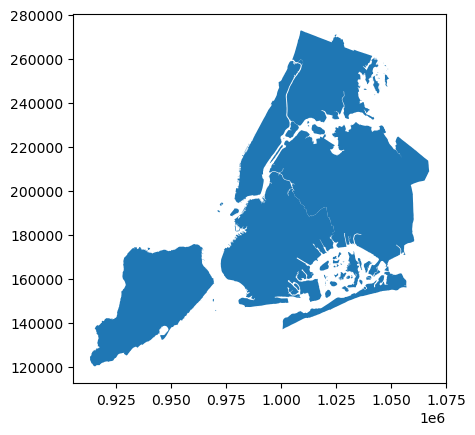

In [26]:
## Mapping Longitude and Latitude- Downloading Map
%pip install geopandas shapely
%pip install geodatasets

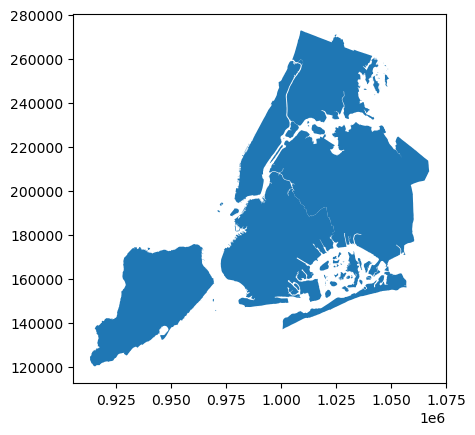

In [7]:
#Mapping Latitude and Longitude
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geodatasets import get_path

#NYC Mapping
path_to_file = get_path("nybb")
nybb = gpd.read_file(path_to_file)

nybb.plot() ##NY Boroughs
plt.show()

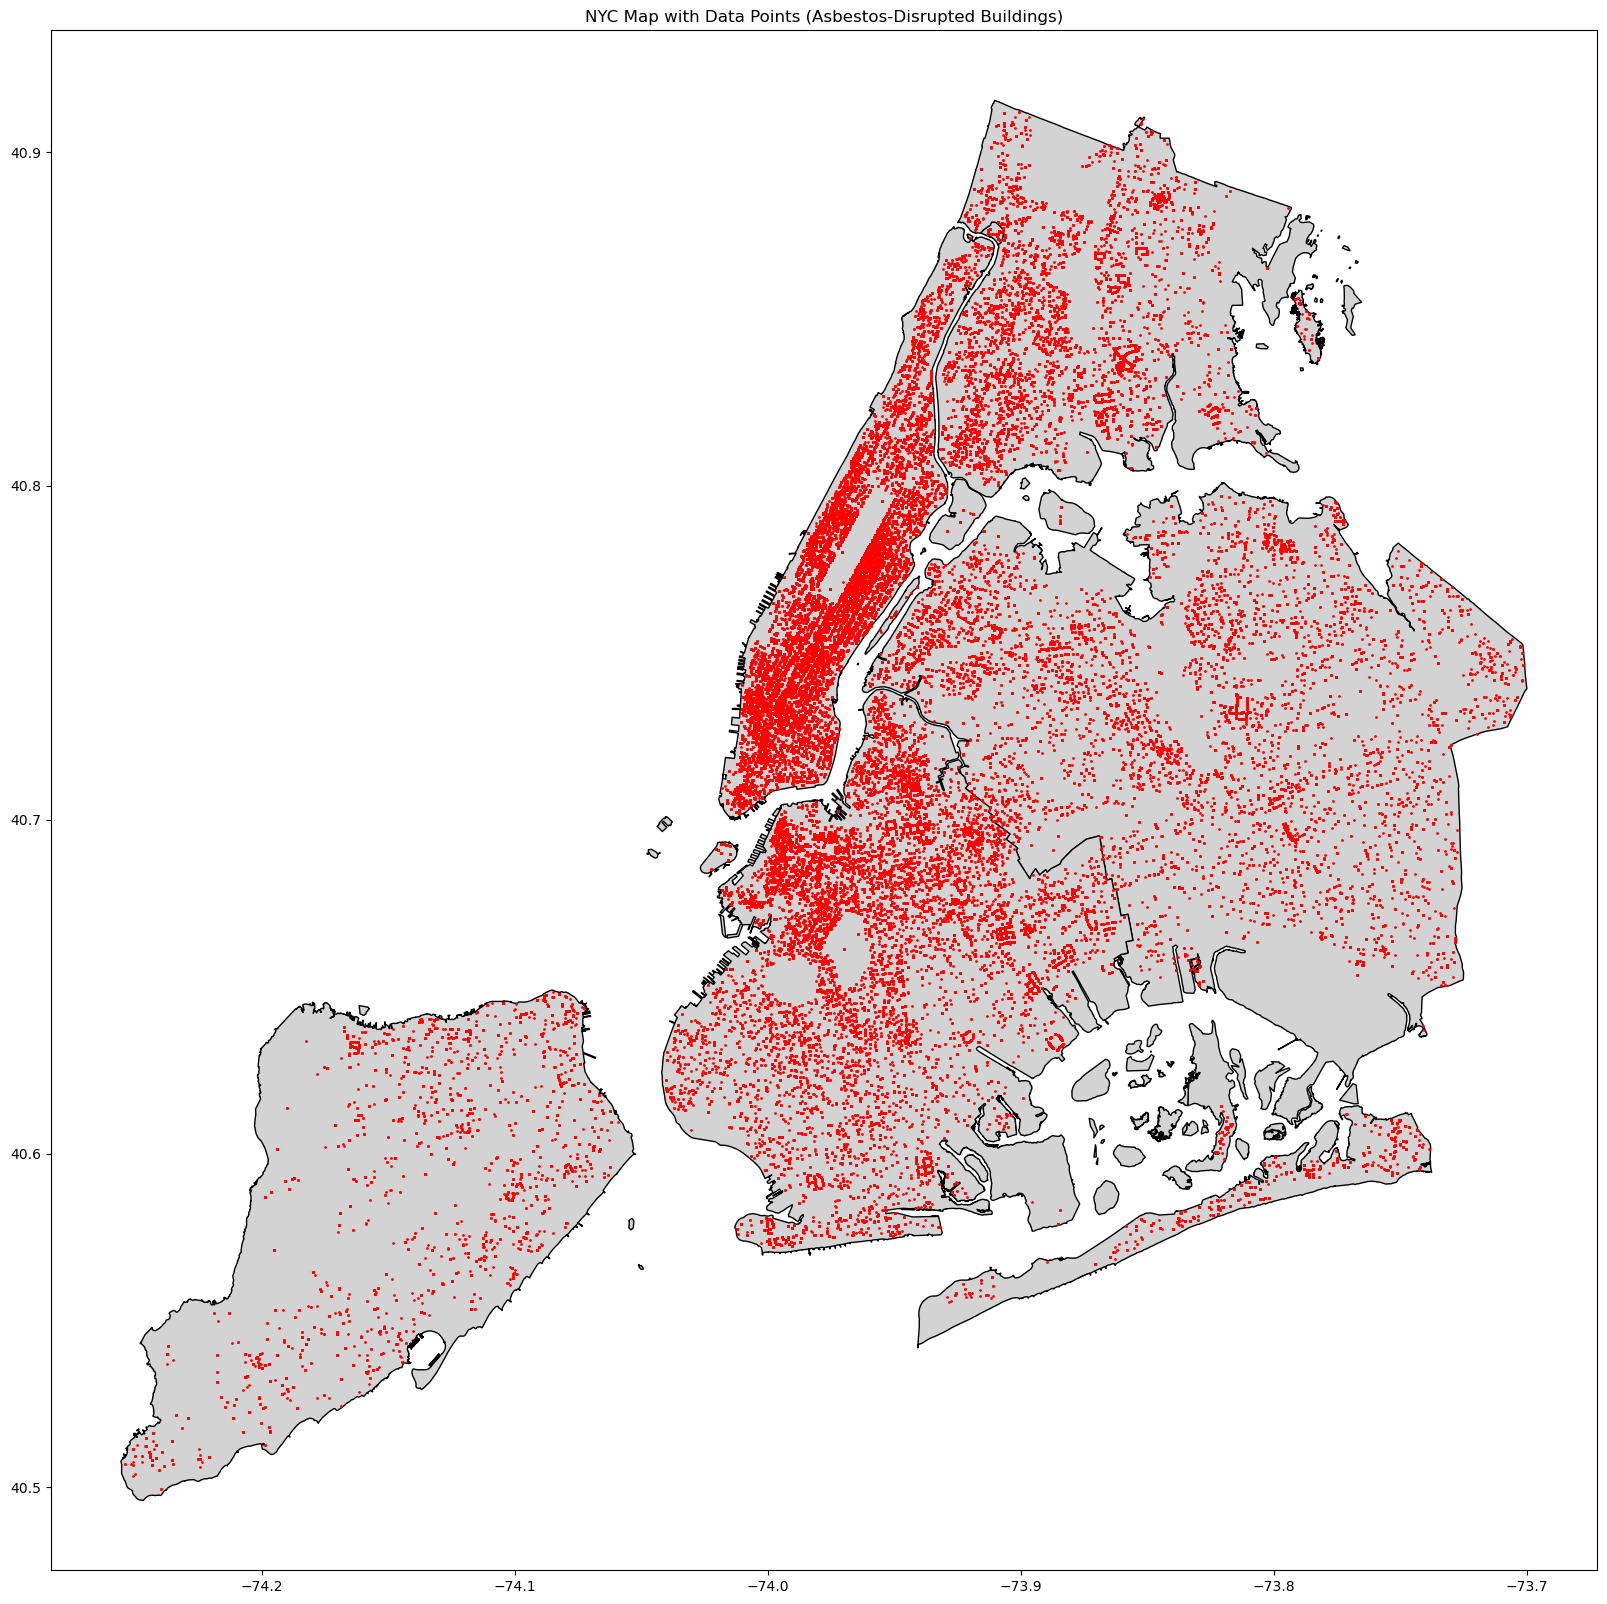

In [8]:
###Mapping Latitude & Longitude
import geopandas as gpd

#Pair the Longitude & Latitude for each observation point
points= [Point(xy) for xy in zip(nyData["LONGITUDE"],nyData["LATITUDE"])]

#Create Dataframe for pairs
points_df= gpd.GeoDataFrame(nyData, geometry=points)
points_df.set_crs(epsg=4326, inplace=True) #Use standard coordinate system 

#Proper Loading of Data (to NY Map)
nybb_path = get_path("nybb")
nybb = gpd.read_file(nybb_path)
nybb = nybb.to_crs(epsg=4326)

#Plotting Points 
fig, ax = plt.subplots(figsize=(20, 20))
nybb.plot(ax=ax, color="lightgray", edgecolor="black")
points_df.plot(ax=ax, color="red", markersize=1)
plt.title("NYC Map with Data Points (Asbestos-Disrupted Buildings)")
plt.show()

In [9]:
nyCode= nyData['ZIP_CODE'].value_counts()
nyCode

ZIP_CODE
11206    9748
11212    6246
10029    5868
11201    5704
10456    5548
         ... 
10199       2
11459       1
10178       1
10173       1
10704       1
Name: count, Length: 226, dtype: int64

In [10]:
nyBorough=nyData['BOROUGH'].value_counts()
nyBorough

BOROUGH
Manhattan        105547
Brooklyn          79187
Bronx             49170
Queens            34921
Staten Island      7550
Name: count, dtype: int64

In [11]:
## Ratio of Asbestos Containing Material (ACM) Property by Borough
# Number of buildings from each borough obtained via google search
MHBuildings = 116000
MHRatio = nyData[nyData['BOROUGH'] == 'Manhattan'].shape[0] / MHBuildings
MHRatio
BKBuildings = 320000
BKRatio = nyData[nyData['BOROUGH'] == 'Brooklyn'].shape[0] / BKBuildings
BKRatio
BXBuildings= 1000000
BXRatio = nyData[nyData['BOROUGH'] == 'Bronx'].shape[0] / BXBuildings
BXRatio
QNBuildings = 1200000

In [14]:
### New Variable: Address

#New Column: Address (Everything has to be read as string)
nyData["ADDRESS"]=(
	nyData["PREMISE_NO"].fillna("").astype(str) + " " +
	nyData["STREET_NAME"].fillna("").astype(str) + ", " +
	nyData["BOROUGH"].fillna("").astype(str)
) 
# Practice :)
print(nyData["ADDRESS"][0])

345 East 73rd Street, Manhattan


In [15]:
## Zillow API to get Building Factors of Interest
import requests
import urllib.parse
import pandas as pd
import os
import time


base_url="https://api.axesso.de/zil"
api_key= "c1194aba85d54c128aae6a5ebd0f890e"
#c137e613b36473ca8ae61658c7ec5c5
cache_file="nyData_zillow.csv"

## Obtaining Address Info from Zillow API
def get_address_info(address):
    encoded_address= urllib.parse.quote(address) #accounts for spaces & commas
    url= f"{base_url}/search-by-address?address={encoded_address}"
    
    headers= {
        'Cache-Control': 'no-cache',
        "axesso-api-key": api_key} #Subscription Key Name found via Zillow API documentation
    response= requests.get(url, headers=headers)
    
    #Debugging Info- Kept getting 401 error code
    if response.status_code == 200:
        return response.json() ## returns dictionary
    else:
        print("Response:", response.status_code, response.text)
        return None

## Loading Results from Zillow API (Cache-- Prevent too many API calls; depleting quota)
if os.path.exists(cache_file):
    cachedDF= pd.read_csv(cache_file)
    nyData=nyData.merge(cachedDF[["ADDRESS", "ConstructionMaterials"]], on="ADDRESS", how="left")
else:
    nyData["ConstructionMaterials"]=None

## Loop for fetching data from Zillow API (ConstructionsMaterials)
#Note: idx --> row index of DF; row --> data in row
for idx, row in nyData[nyData["ConstructionMaterials"].isnull()].iterrows(): #Only for rows without ConstructionMaterials info
    add=row["ADDRESS"]
    building_info= get_address_info(add) #API Function Call

    if building_info and "constructionMaterials" in building_info:
        nyData.at[idx, "ConstructionMaterials"]= building_info["constructionMaterials"]
    else:
        nyData.at[idx, "ConstructionMaterials"]= None

    ## Saving to Cache File after each API call
    nyData.to_csv(cache_file, index=False) 
    time.sleep(6) #10 Requests per minute -- Free Trial Limit

#09/09: #403 Error: Free Trial ran out of allowed API calls

## Extracting Factors of Interest for each address in dataset --> PREMISE_NO + STREET_NAME + BOROUGH = Address



Response: 403 { "statusCode": 403, "message": "Out of call volume quota. Quota will be replenished in 26.08:27:50." }
Response: 403 { "statusCode": 403, "message": "Out of call volume quota. Quota will be replenished in 26.08:23:40." }


KeyboardInterrupt: 

In [ ]:
### New Variable: Construction Materials
nyData["CONSTRUCTION_MATERIALS"]= nyData["ADDRESS"].apply(get_address_info)